## EDA to prediction (titanic)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=2)

In [15]:
# 데이터 불러오기, 데이터 확인 
data = pd.read_csv("../data/titanic.csv")
data.head() 
data.tail() #PassengerID가 891인거 보면 891명이 타고 있었음을 알 수 있다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [16]:
# 결측치 확인(자주사용)
data.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## How many Survived?

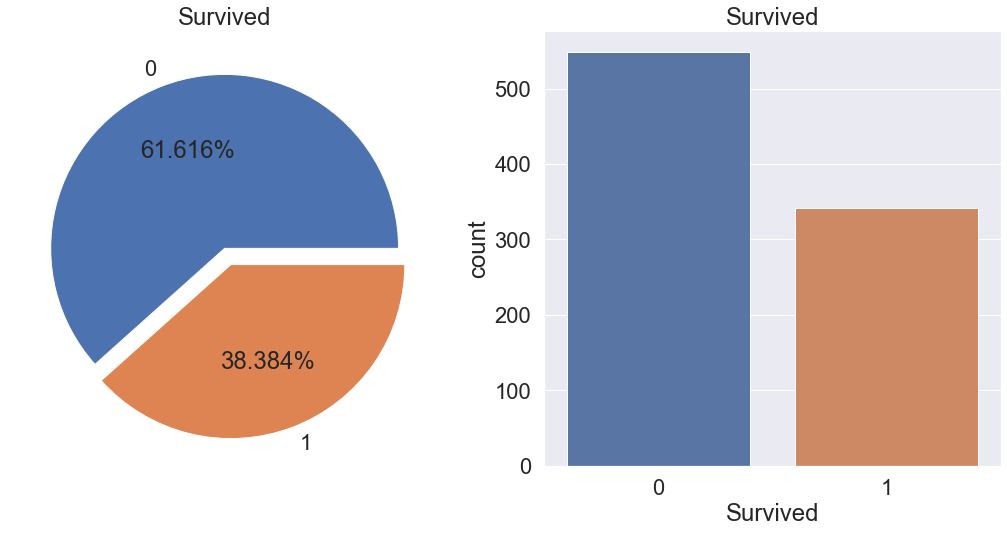

In [17]:
f,ax=plt.subplots(1,2,figsize = (18,8))
#1=log의 개수 2=culumn의 개수 캔버스만드는 과정
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.3f%%', ax=ax[0])
#value_counts()는 null value 반환x
#explode 그래프 사이 거리조절
#autopct 소수점 1.3 셋째자리
#ax=ax[0] 왼쪽에 그래프 그리기
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
#ax[1].set_ylabel('')
plt.show()

0 : Survived , 1 : Dead

891명의 passenger중에 대략 350명, 38.4% 만 살았다는 것을 알 수 있다.

Age, Pclass..등 feature 에 따라 생존률에 영향을 주었는지 확인하기 위해 Feature들의 타입을 확인한다.

## Types Of Features
- Categorical Features : Sex, Embarked 순서 상관 없는 것
- Ordinal Features : PClass 서열,순서가 있는 것 
- Continuous Feature : Age 

In [18]:
# 성별에 따른 생존률 확인
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [19]:
data[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


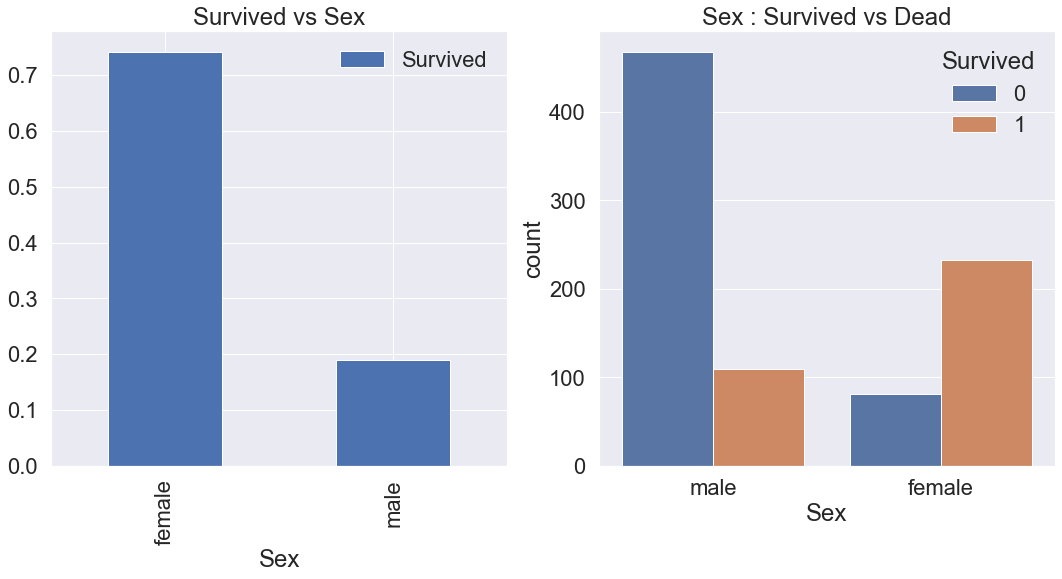

In [20]:
f, ax = plt.subplots(1,2,figsize = (18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

탑승자는 남자가 많지만 생존자는 여자가 더 많은 것을 볼 수 있다. 여자의 생존률은 약 75%, 남자는 18%정도이다.

In [21]:
# 좌석 class 별 생존률 확인해보자
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


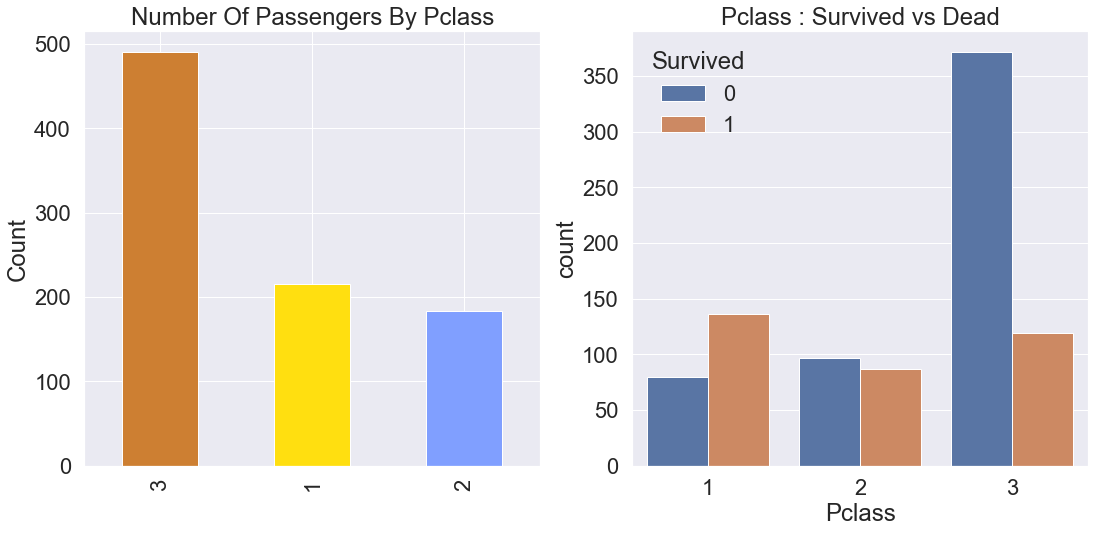

In [22]:
f,ax = plt.subplots(1, 2, figsize = (18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF10', '#809fff'], ax = ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Pclass : Survived vs Dead')
plt.show()

Pclass 1 > 2 > 3 (등급순)

Pclass 3의 탑승인원이 가장 많지만 생존률이 낮은 것을 볼 수 있다. 반면 Pclass 1의 생존률은 매우 높은 것을 확인 할 수 있다. 

In [23]:
# survival rate, sex, Pclass 간의 관계를 알아보자.
pd.crosstab([data['Sex'], data['Survived']], data['Pclass'], margins = True).style.background_gradient(cmap='summer_r')

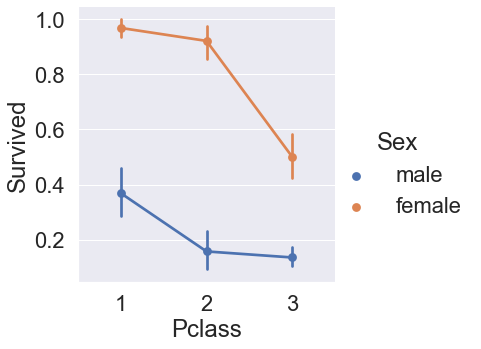

In [24]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = data)

Categorical value(성별, 그룹 등 순서에 의미가 없는 것)는 FactorPlot 사용. 한눈에 보기 쉬움 

Pclass 1 여성은 90% 이상의 확률로 생존했다.


In [25]:
print('Oldest Passenger was of:', data['Age'].max(),'Years')
print('Youngest PAssenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:', data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest PAssenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


In [26]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

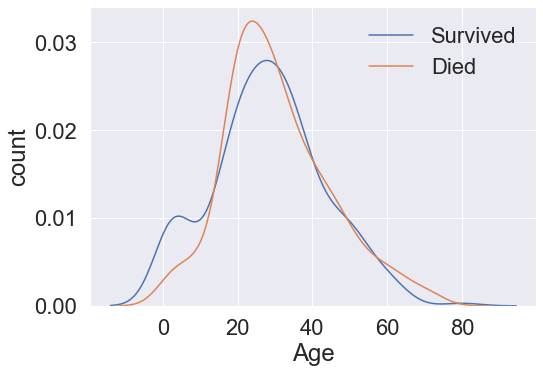

In [27]:
sns.kdeplot(data.loc[data['Survived']==1, 'Age'], label = 'Survived') #파란선
sns.kdeplot(data.loc[data['Survived']==0, 'Age'], label = 'Died') #주황선
plt.xlabel('Age')
plt.ylabel('count')
plt.legend()

Text(0, 0.5, 'count')

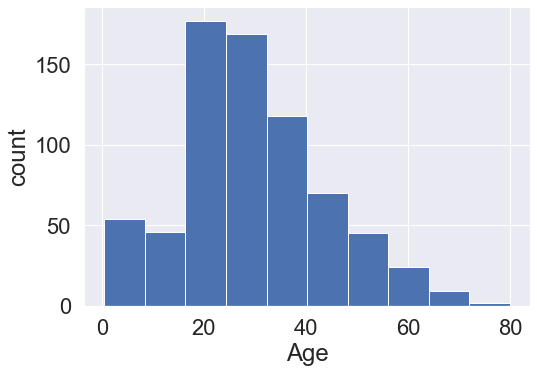

In [28]:
data['Age'].hist()
plt.xlabel('Age')
plt.ylabel('count')

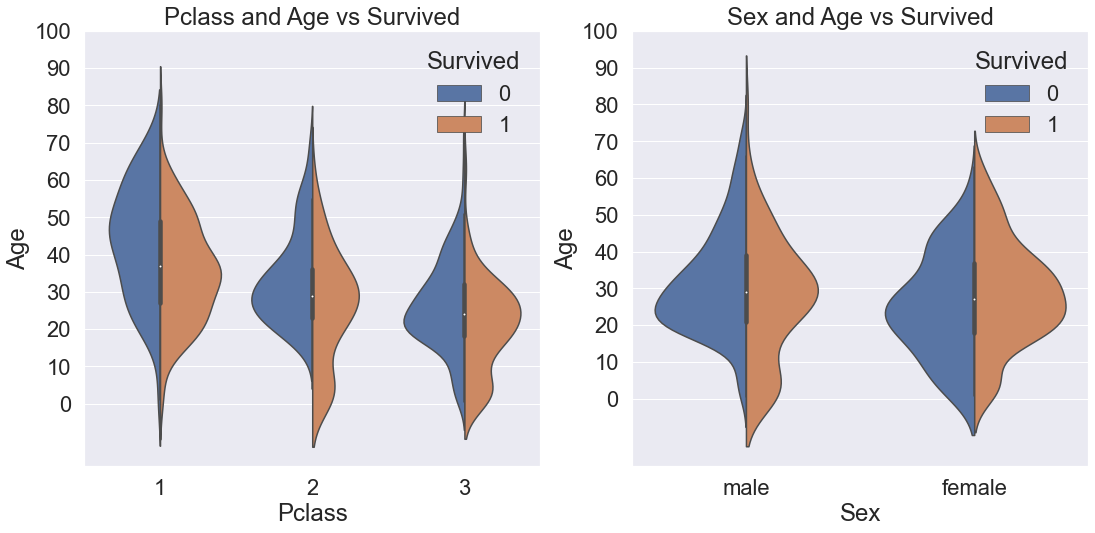

In [29]:
f,ax = plt.subplots(1, 2, figsize = (18,8))
sns.violinplot("Pclass", "Age", hue = 'Survived', data = data, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
# yticks : 새로에 있는 수자 범위 0부터 10씩 증가 
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

1. Pclass 에 관계없이 10세 이하의 Age는 생존률이 높다.
2. Pcalss1 에서 20-50세 생존률이 높고, 여성에서 높게 나타난다.

Age 변수에 177개의 값이 비어있다. 이 값을 평균 나이인 29새로 하는 것은 문제가 생긴다. (3살인데 29세라고 하면 정확한 에측이 어려움)

따라서 승객의 연령대를 알기위해 Mr, Mrs, 각 그룹의 평균 나이를 알아보자.

In [30]:
data['Initial'] = 0
for i in data :
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [31]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = 'summer_r')
# T -> transpose 행렬 위치 바꿔줌

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [32]:
# 잘못 써진 이름 Mr, Mrs로 바꾸는 과정 
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don']
                       ,['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [33]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [34]:
# 이름 바꼈나 확인 
data.loc[1:,:]
data.iloc[:,:4]
# loc 행 선택 [3:10,:] -> 3행부터 10행까지 출력
# iloc 열 선택 [:,:3] -> 3열까지 출력

,PassengerId,Survived,Pclass,Name
0,1,0,3,"Braund, Mr. Owen Harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,3,"Allen, Mr. William Henry"
...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas"
887,888,1,1,"Graham, Miss. Margaret Edith"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell"


In [35]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

In [36]:
# NULL인 Age에 각 그룹 별 평균 나이로 바꿔주자
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [37]:
data.Age.isnull().any()

False

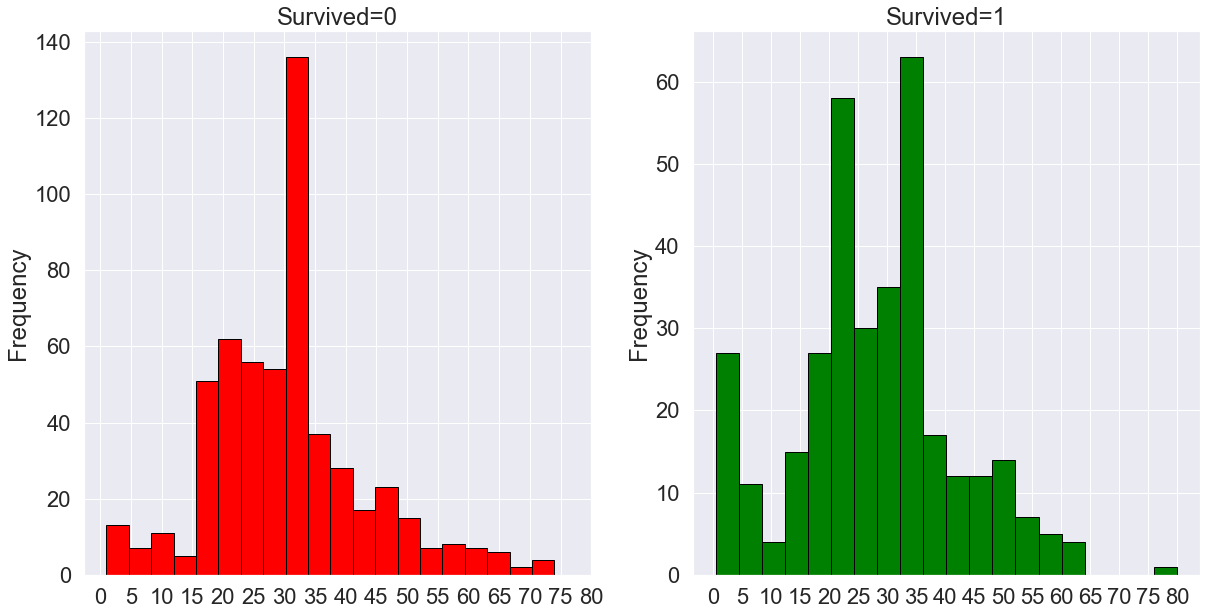

In [38]:
f,ax = plt.subplots(1, 2, figsize = (20,10))
data.loc[data['Survived']==0].Age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'red')
ax[0].set_title('Survived=0')
ax[0].set_xticks(range(0, 85, 5))
data.loc[data['Survived']==1].Age.plot.hist(ax = ax[1], bins = 20, edgecolor = 'black', color = 'green')
ax[1].set_title('Survived=1')
ax[1].set_xticks(range(0, 85, 5))

1. 5세 이하 아이들은 많이 구조되었다.
2. 가장 나이 많은 승객은 구조되었다.
3. 가장 많이 사망한 연령대는 30-40대 이다.

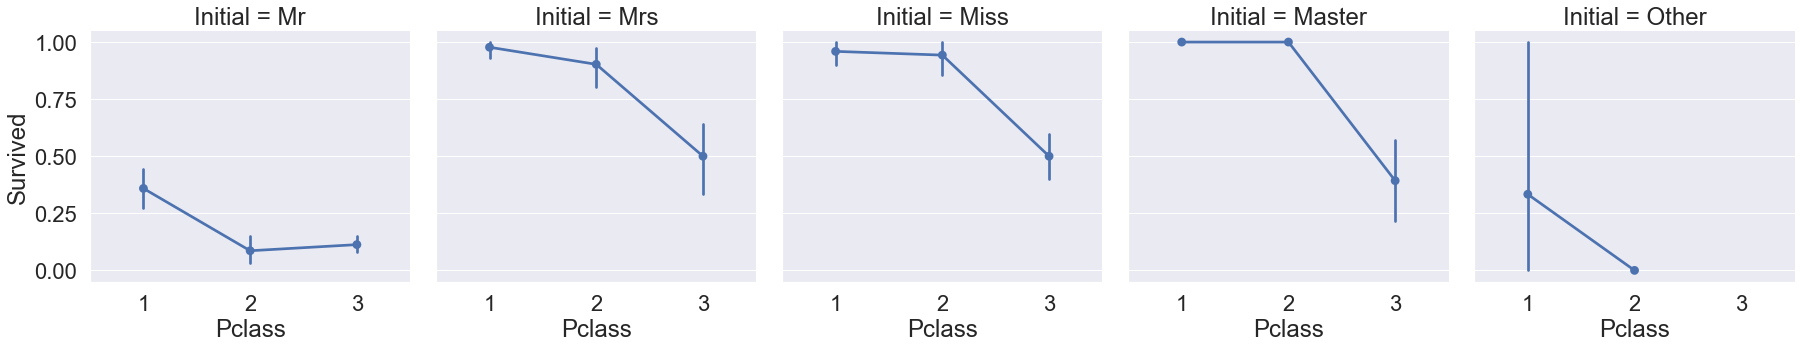

In [39]:
# Pclass에 따른 생존률을 initial(Mr,Mrs...)별로 구분해서 보자.
sns.factorplot('Pclass', 'Survived', col = 'Initial', data = data)
plt.show()

여성과 아이는 모든 클래스에서 생존률이 높다.

In [40]:
pd.crosstab([data.Embarked, data.Pclass],
            [data.Sex, data.Survived], margins = True).style.background_gradient(cmap = 'summer_r')

## Chances for Survival by Port Of Embarkation (탑승 항구 별 생존률)

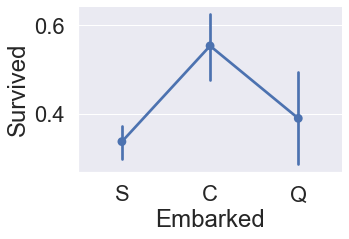

In [41]:
sns.factorplot('Embarked', 'Survived', data = data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

C 항구의 생존률이 약 0.55 정도로 가장 높고 S의 생존률이 가장 낮다.

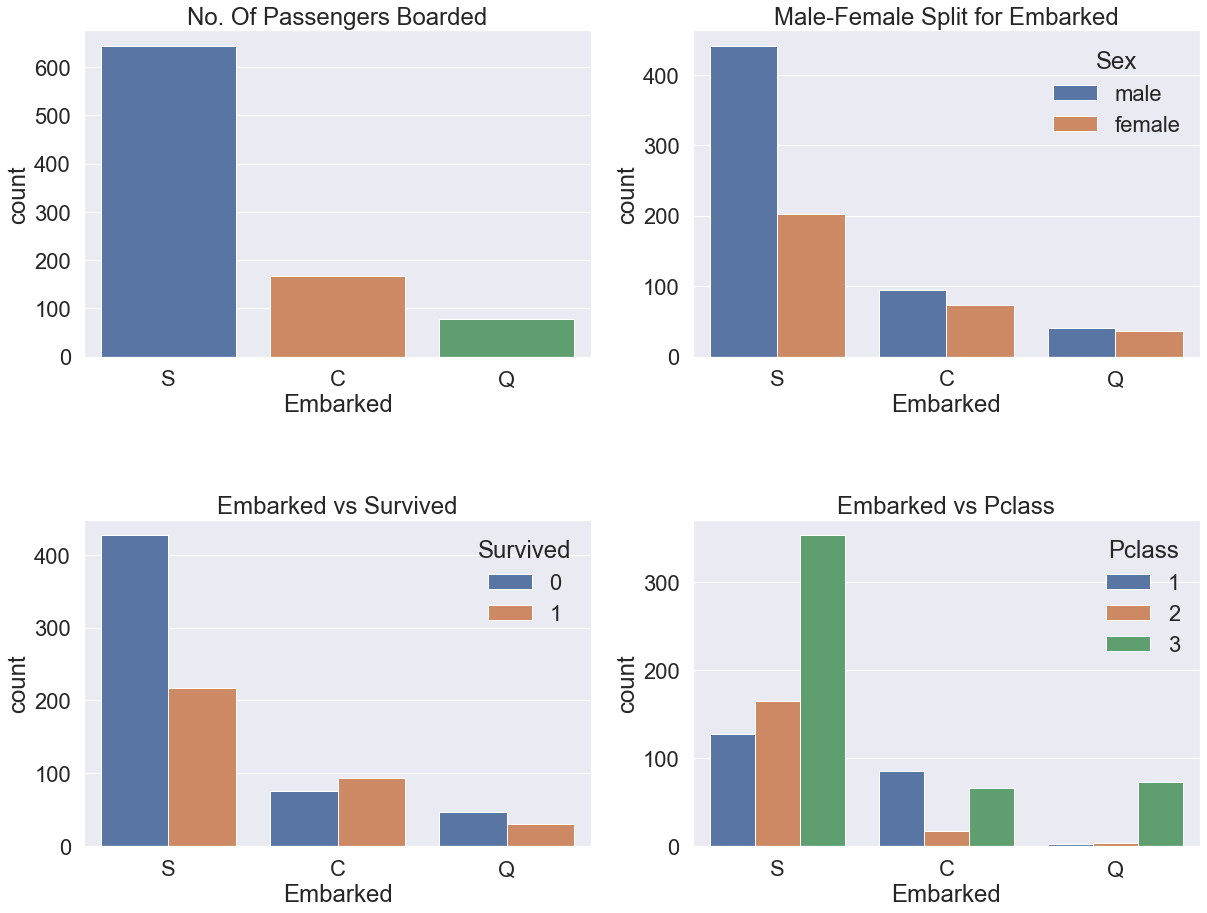

In [42]:
f,ax = plt.subplots(2,2,figsize = (20,15))
sns.countplot('Embarked', data = data, ax = ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue = 'Sex', data= data, ax = ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue = 'Survived', data = data, ax = ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue = 'Pclass', data = data, ax = ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace = 0.5)
plt.show()

1. S 항구에 탑승한 승객이 가장 많다. 대부분은 Pclass 3 승객이다. 
2. C 항구에 탑승한 승객은 생존률이 높다.  이유는 Pclass1 승객이 많아서 인 것 같다. 
3. S 항구는 Pclass1의 승객이 많이 탔음에도 불구하고 생존률이 낮다. 이유는 Pclass3 또한 많이 탔기 때문이다. 
4. Q 항구는 대부분 Pclass3 승객이다.

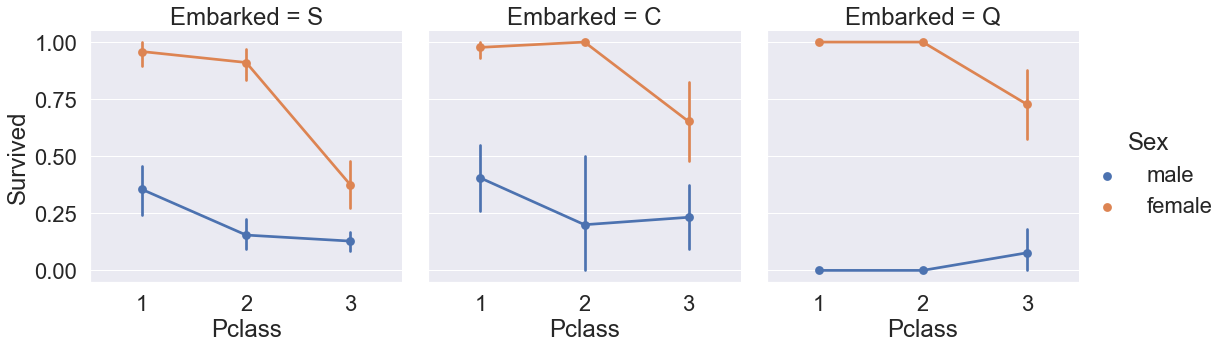

In [43]:
# Embarked(항구)와 성별에 따른 생존률을 알아보자. 
# col = 'Embarked' 사용해서 항구별로 그래프 나오게 하기
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data = data)

1. 모든 항구에서 여성의 생존률이 훨씬 높다.
2. 여성의 생존률은 다른 Pclass 에 비해 Pclass3 에서 낮게 나타난다. 
3. S 항구에서 탑승한 Pclass3 의 승객은 가장 생존률이 낮게 나타난다.  

## Filling Embarked NaN 
- Embarked 의 NaN 채우기. 대부분의 탑승객이 S 항구에서 탔으므로 S 로 채운다

In [44]:
#data['Embarked'].isnull().sum()
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [45]:
data['Embarked'].fillna('S', inplace = True)

In [46]:
data.Embarked.isnull().any() # NaN 모두 제거 되었는지 확인 

False

## SibSp → Discrete Feature
이 Feature는 탑승객이 혼자인지 아니면 가족과 함께 탔는지를 나타냅니다.

Sibling → 형제자매, 의붓형제자매

Spouse → 배우자

In [47]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap = 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


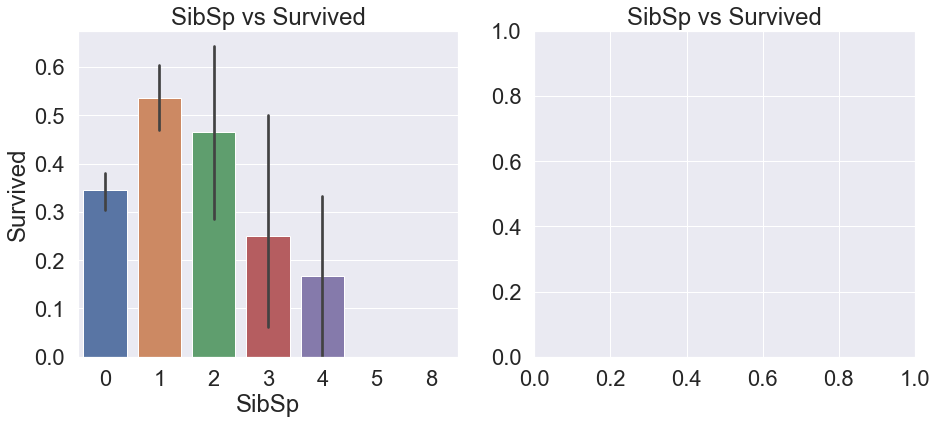

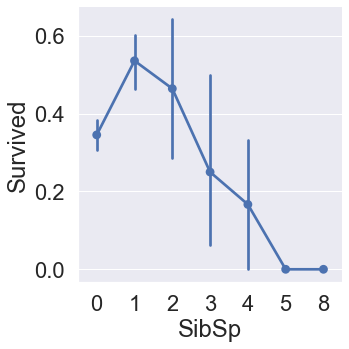

In [48]:
f, ax = plt.subplots(1, 2, figsize=(15,6))

sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')

#plt.close()
plt.show()

In [49]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


1. barplot 을 보면 형제, 자매, 배우자가 없는 경우 생존률이 35% 정도 인 것을 볼 수 있다. 
2. 가족 수가 증가할수록 그래프의 기울기가 감소하는 것을 볼 수 있다. 
3. 가족이 있다면 서로를 살리기 위해 희생하기 때문에 이와 같은 결과라고 볼 수 있다. 
4. 하지만 가족이 5-8 인 승객의 생존률은 0% 인 것을 볼 수있다. 
5. croostab을 보면 SibSp > 3 인 승객은 모두 Pclass3 에 탑승했기 때문에 이러한 결과가 나왔다고 볼 수 있다.

## Parch 

In [50]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


crosstab 은 가족 구성원이 많은 승객은 Pclass3 에 많이 탄 것을 보여준다.

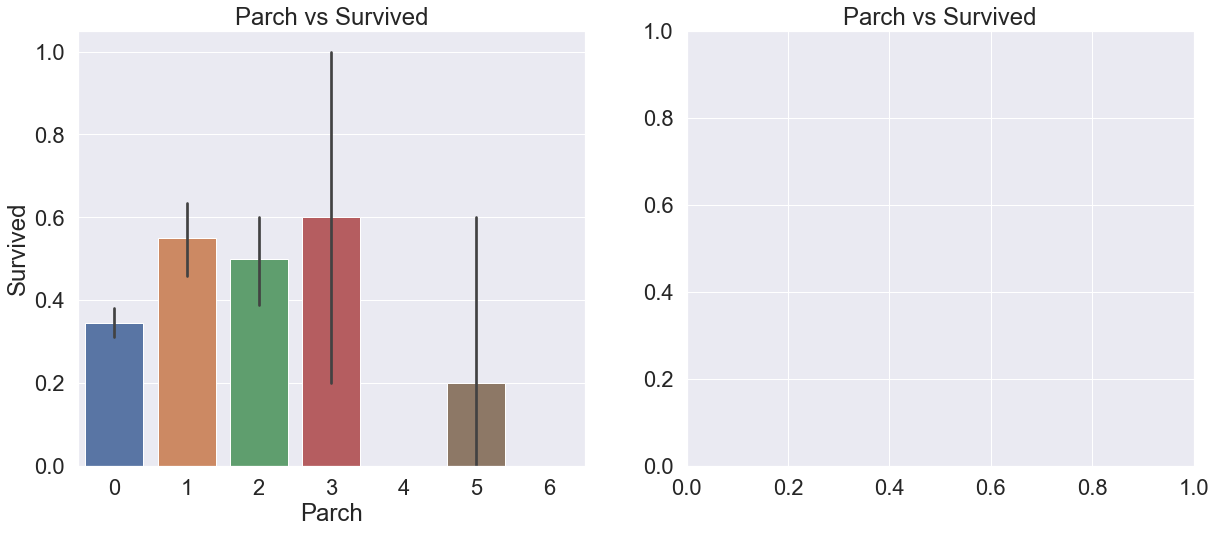

In [51]:
f,ax = plt.subplots(1, 2, figsize = (20,8))
sns.barplot('Parch', 'Survived', data = data, ax = ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data = data, ax = ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()
# factorplot은 왜 안나와?
# plt.close 하는 이유?

## Fare -> Continuous Featuers

In [52]:
print('Highest Fare was: ', data['Fare'].max())
print('Lowest Fare was: ', data['Fare'].min())
print('Average Fare was: ', data['Fare'].mean())

Highest Fare was:  512.3292
Lowest Fare was:  0.0
Average Fare was:  32.204207968574636


가장 낮은 요금은 0 원 입니다.

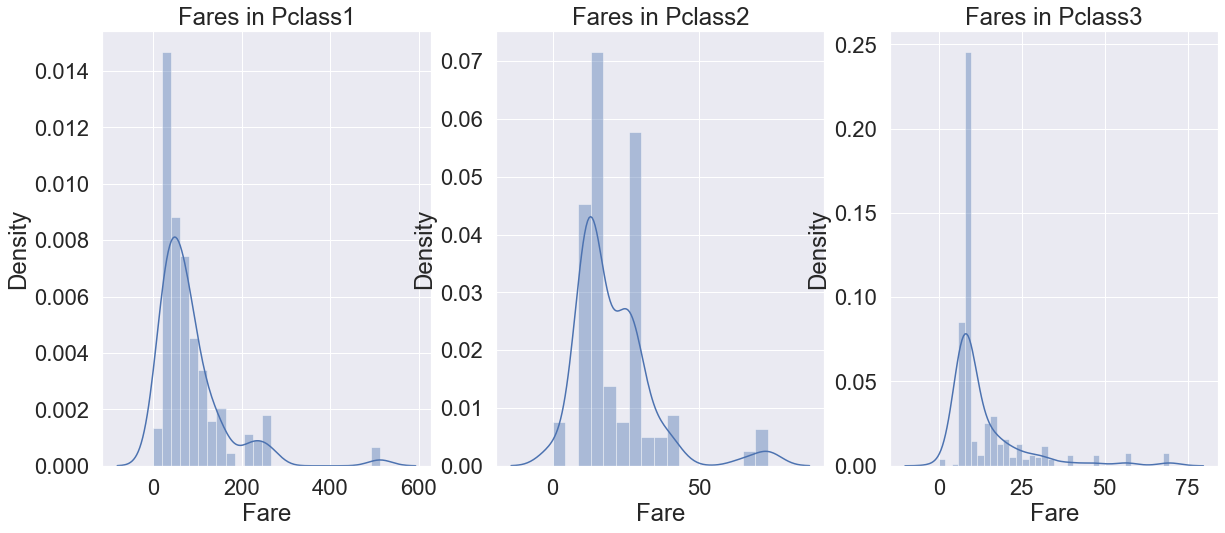

In [53]:
f,ax = plt.subplots(1, 3, figsize = (20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax = ax[0])
ax[0].set_title('Fares in Pclass1')
sns.distplot(data[data['Pclass']==2].Fare, ax = ax[1])
ax[1].set_title('Fares in Pclass2')
sns.distplot(data[data['Pclass']==3].Fare, ax = ax[2])
ax[2].set_title('Fares in Pclass3')
plt.show()

Pclass 1 탑승객의 경우 요금 분포가 넓게 퍼져있습니다. 그리고 Pclass 의 등급이 낮아질 때마다 분포가 좁아집니다. 이 변수는 연속형이기 때문에, 우리는 binning 을 통해 이산형 값들로 변환해줄 것입니다.

## Feature 들의 관찰 결과 요약:
- Sex : 남성보다 여성의 생존률이 높았다.
- Pclass: Pclass 의 등급이 높을수록 생존률이 높고, Pclass3 의 생존률이 가장 낮았다.
- Age: 어린 아이들의 생존 활률이 높았다.
- Embarked: 항구 S 의 탑승객이 가장 많지만, 항구 C 의 생존률이 더 높게 나타났다.
- Parch+SibSp: 혼자 탑승한 경우보다 1-2명의 자녀, 1-3명의 가족과 탑승한 승객의 생존률이 높았다.또한 많은 가족과 탑승한 경우 생존률이 낮았다.

## Correlation Between The Features

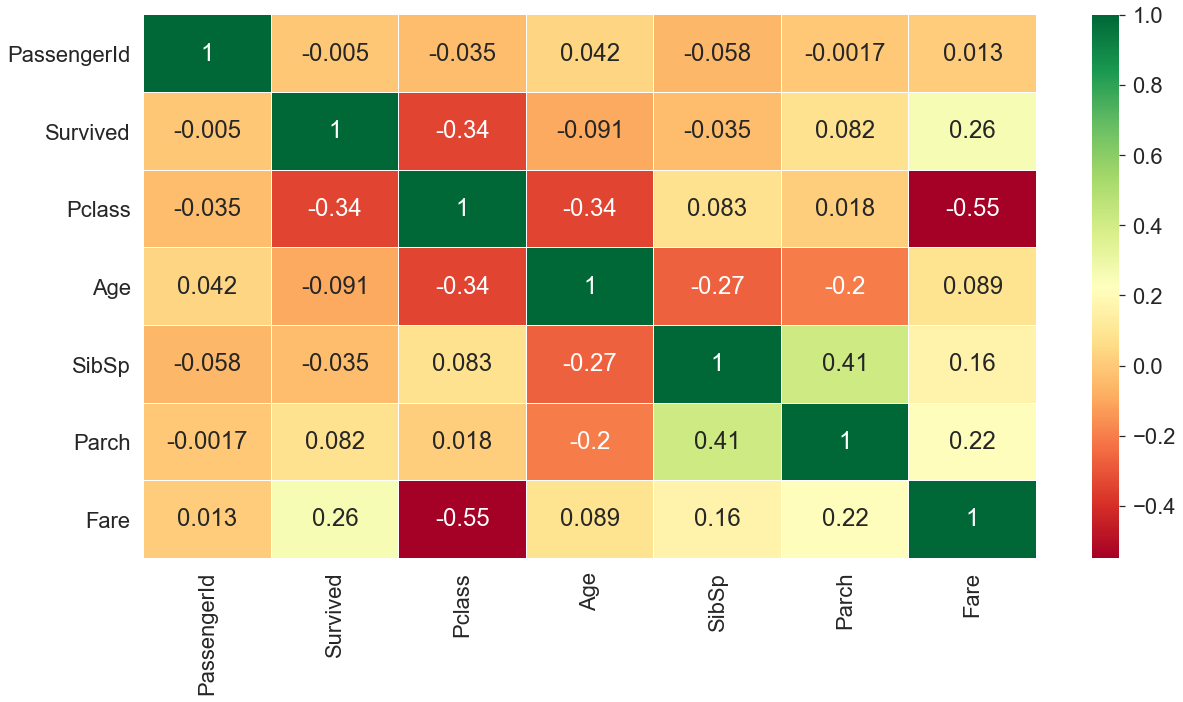

In [54]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

두 Feature가 상당히 높은, 혹은 완전한 양의 상관관계를 가지고 있다고 하면, 한 feature값이 증가하면 다른 feature의 값도 증가합니다. 
이것은 두 feature가 매우 비슷한 정보를 가지고 있으며, 그 정보간의 분산이 거의 없다는 것을 의미합니다. 이를 다중공선성(MultiColinearity)이라 합니다.
이 변수들이 redundant할 때, 우리는 그 변수를 둘 다 사용해야할까요? 
모델을 만들거나 학습시킬 때, 학습시간을 줄이는 등 다른 이점을 위해 redudant한 feature는 제거되도록 해야합니다.
위의 Heatmap을 보았을 때, feature들간의 상관관계는 그렇게 높아보이지 않습니다. 
가장 높은 상관관계를 지닌 두 변수는 SibSp와 Parch로 상관계수는 0.41입니다. 그렇기 때문에 모든 feature를 사용하도록 하겠습니다.

## Part 2 : Feature Engineering and Data Cleansing

- Feature Engineering ?
: 모든 feature가 중요하지 않기 때문에 dataset에서 제거되어야 할 feature를 알아보고, 새로운 feature를 만들기도 하는 것 이다. 

즉, 예측 모델에 적합한 형태로 feature를 변환하는 것이다. 

## Age_band

In [55]:
data['Age_band'] = 0

data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4

data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [56]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')
# 각 연령 구간의 탑승객 수 체크 

,Age_band
1,382
2,325
0,104
3,69
4,11


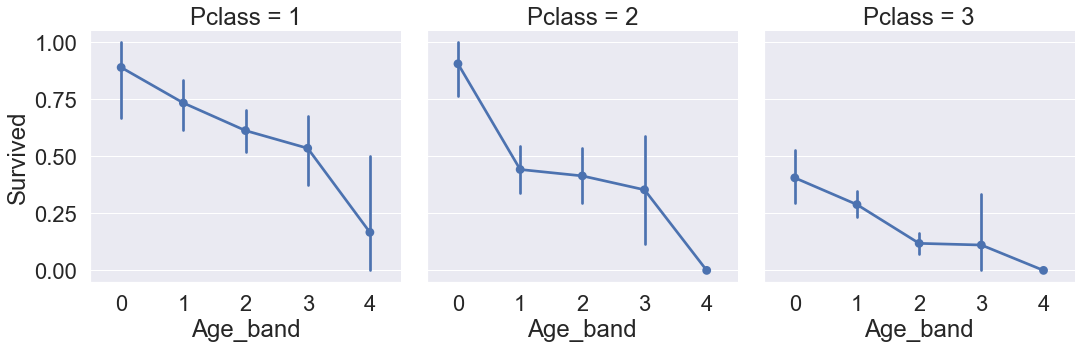

In [58]:
sns.factorplot('Age_band', 'Survived', data=data, col = 'Pclass')
plt.show()

Pclass 와 상관없이 연령이 증가할수록 생존률은 낮아진다. 

## Family_Size 와 Alone

이번에는 "Family_Size"와 "Alone" Feature를 만들어 분석하겠습니다. 

이 Feature들은 Parch와 SibSp의 요약입니다. 가족의 수와 생존률의 관계를 체크하기 위한 통합된 데이터를 얻을 수 있습니다. 

Alone은 승객이 혼자인지 아닌지를 나타냅니다.

In [60]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1

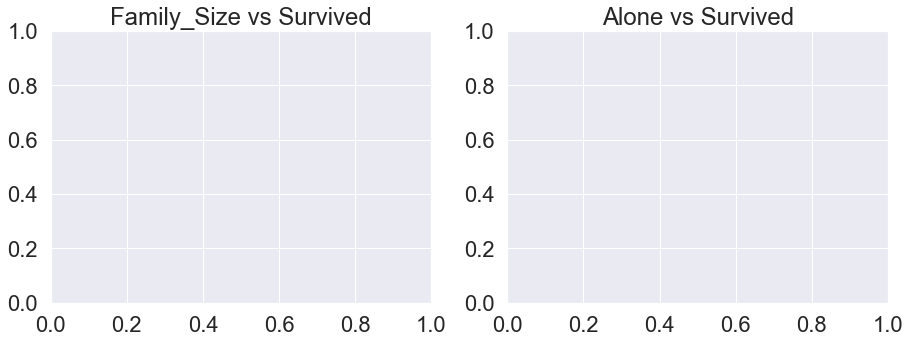

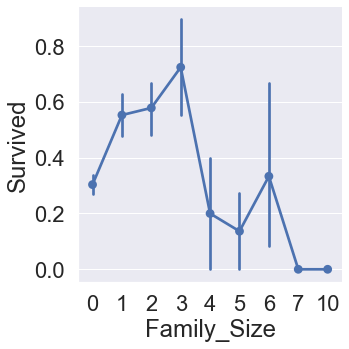

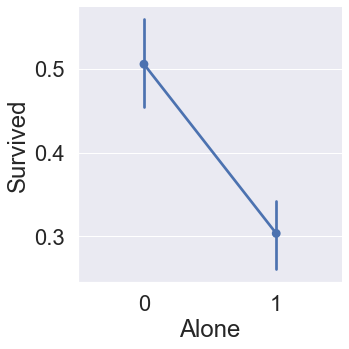

In [63]:
f, ax = plt.subplots(1, 2, figsize=(15,5))

sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

#plt.close(2)
#plt.close(3)
plt.show()

Family_Size = 0 은 탑승객이 혼자임을 의미합니다. 혼자일 때, 생존률은 매우 낮습니다. 
가족 수가 4명 이상일 때도 생존률은 감소합니다. 때문에 모델링에 중요한 Feature인 것 같습니다. 조금 더 분석해보겠습니다.

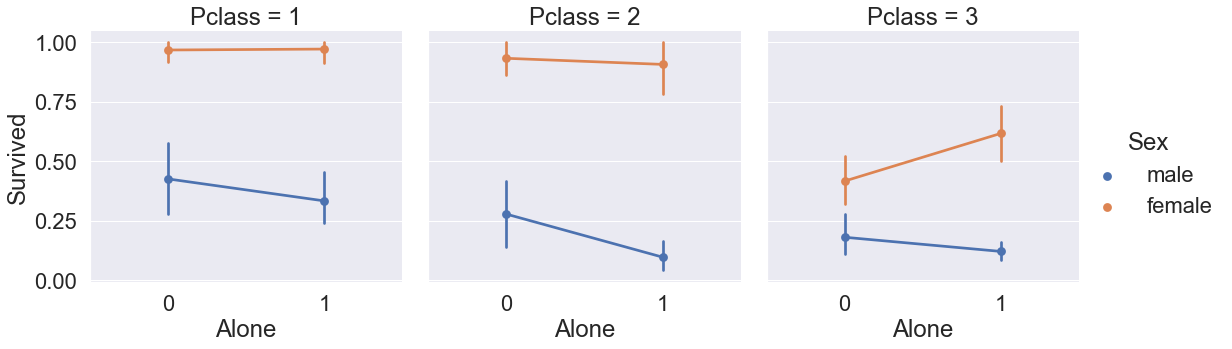

In [64]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col = 'Pclass')
plt.show()

Pclass와 무관하게 혼자 탑승한 경우는 위험합니다.

하지만 예외적으로 Pclass 3 여성 탑승객의 생존률은 가족과 함께 탑승하지 않은 경우보다 오히려 높습니다.

## Fare_Range

- Fare는 연속형 Feature이기 때문에, 이것을 서수형 값(Ordinal value)로 변환하겠습니다. 이 작업에pandas.qcut을 사용할 것입니다.
- qcut 은 우리가 입력한 구간의 수(bin)에 따라 데이터 값을 분할 해줍니다. 가령 우리가 5개 구간을 입력하면, 5개의 구간으로 데이터 수를 균일하게 분할합니다.

In [67]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


위에서 얘기한 것처럼, Fare_Range가 증가할 수록 생존률도 증가합니다.

하지만 우리는 Fare_Range를 그대로 사용할 수 없습니다. Age_Band에서 했던 것과 동일하게 하나의 값으로 변환해주어야 합니다.

In [68]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare']<=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare']<=31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare']<=513), 'Fare_cat'] = 3

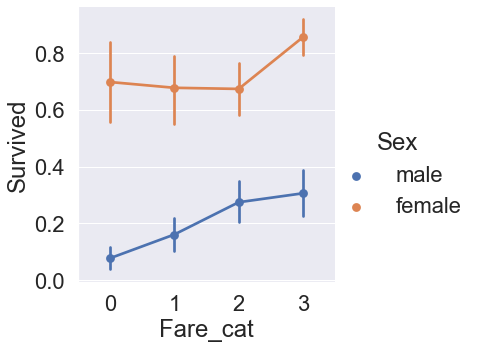

In [69]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

Fare_cat 이 증가할수록 생존률이 증가합니다. 이것도 Sex와 함께 모델링에 중요한 Feature가 될 것 같습니다.

## 문자열 값을 숫자형으로 변환하기

문자열 값을 머신러닝 모델에 사용할 수 없기 때문에, Sex, Embarked 등의 feature를 숫자값으로 변환해주어야 합니다. 
